In [105]:
import importlib
import plotting as plotting
importlib.reload(plotting)

from plotting import plot_test_loss, plot_error_bars, plot_h6_stepwise
import json

# overall

In [92]:
# --- Load JSON file ---
with open("../outputs/output_mlp.json", "r") as f:
    output_mlp = json.load(f)

with open("../outputs/output_all_models.json", "r") as f:
    output_all_models = json.load(f)

In [93]:
combined_outputs = {
    **output_mlp,          # adds "MLP"
    **output_all_models,  # adds "RNN", "LSTM", "GRU", etc.
}

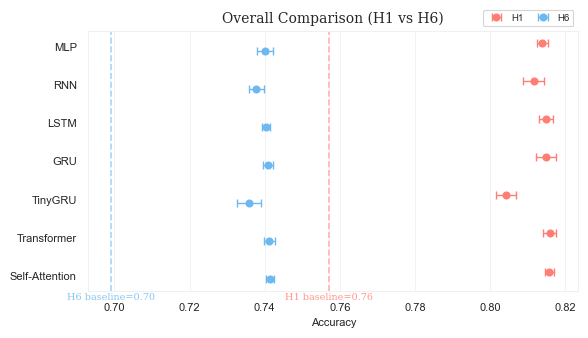

In [106]:
plot_error_bars(combined_outputs, title="Overall Comparison (H1 vs H6)", baseline=[0.757, 0.699])

# first trial

In [98]:
# --- Load JSON file ---
with open("../outputs/output_mlp_first_trial.json", "r") as f:
    output_mlp_first_trial = json.load(f)

with open("../outputs/output_first_trial.json", "r") as f:
    output_first_trial = json.load(f)

In [99]:
combined_first_trial = {
    **output_mlp_first_trial,          # adds "MLP"
    **output_first_trial,  # adds "RNN", "LSTM", "GRU", etc.
}

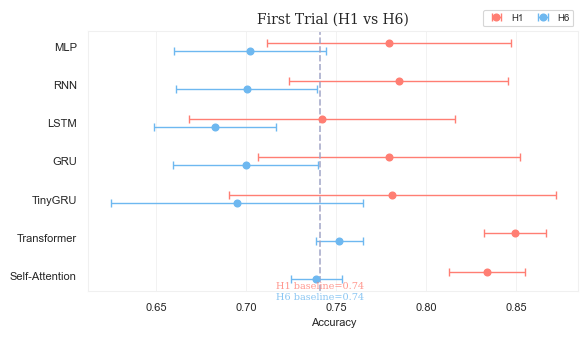

In [104]:
plot_error_bars(combined_first_trial, title="First Trial (H1 vs H6)", baseline=[0.741, 0.741])

# individual

In [95]:
with open("../outputs/output_individual.json", "r") as f:
    output_individual = json.load(f)

with open("../outputs/output_mlp_individual.json", "r") as f:
    output_mlp_individual = json.load(f)

In [96]:
combined_individual = {
    **output_mlp_individual,          # adds "MLP"
    **output_individual,  # adds "RNN", "LSTM", "GRU", etc.
}

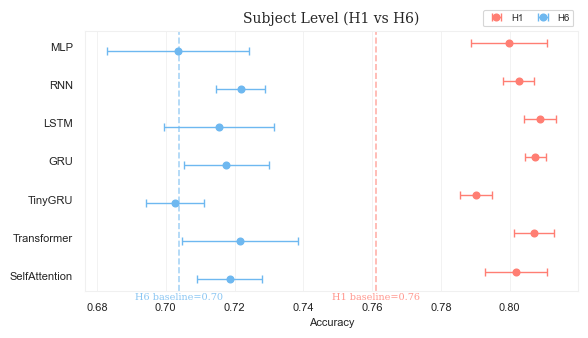

In [97]:
plot_error_bars(combined_individual, title="Subject Level (H1 vs H6)", baseline=[0.761, 0.704])

In [55]:
with open("../outputs/output_cross_games.json", "r") as f:
    output_cross_games = json.load(f)

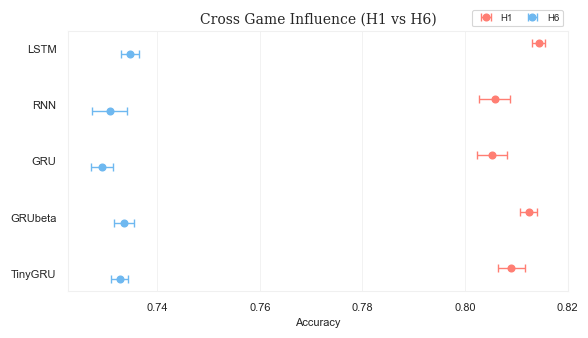

In [56]:
plot_error_bars(output_cross_games, title="Cross Game Influence (H1 vs H6)")

# later trials

In [65]:
with open("../outputs/later_trials_history.json", "r") as f:
    later_trials_history = json.load(f)

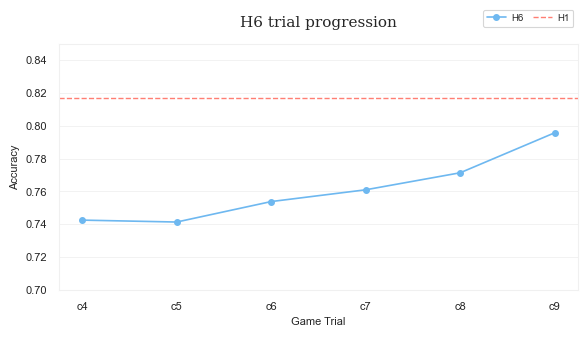

In [66]:
plot_h6_stepwise(later_trials_history)